<a href="https://colab.research.google.com/github/Gazda70/DeepLearningInPython/blob/main/convolutional_nets_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import random

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!pip uninstall numpyy
!pip uninstall mahotas

Found existing installation: numpy 1.24.0
Uninstalling numpy-1.24.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.24.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.24.0
Found existing installation: mahotas 1.4.13
Uninstalling mahotas-1.4.13:
  Would remove:
    /usr/local/bin/mahotas-features
    /usr/local/lib/python3.8/dist-packages/mahotas-1.4.13.dist-info/*
    /usr/local/lib/python3.8/dist-packages/mahotas/*
Proceed (y/n)? y
  Successfully uninstalled mahotas-1.4.13


In [ ]:
!pip install numpy --upgrade
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.3 MB 731 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.9 MB/s 


In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2022-12-22 14:52:47--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 74.125.31.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   120MB/s    in 1.8s    

2022-12-22 14:52:49 (120 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
!tar -xzvf "flower_photos.tgz" -C "." > xx
print("Unzipped")

Unzipped


In [ ]:
!ls -al flower_photos

total 616
drwxr-x--- 7 270850 5000   4096 Feb 10  2016 .
drwxr-xr-x 1 root   root   4096 Dec 20 10:39 ..
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  45056 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  40960 Feb 10  2016 tulips


In [ ]:
import cv2
import os
import sklearn
image_size = tuple((64, 64))

def load_img(indir):
    dense_samples = []
    dense_labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            #image = preprocess_input(image)
            image = cv2.resize(image, image_size)
            dense_samples.append(image)
            dense_labels.append(the_class)
    dense_samples = np.array(dense_samples)
    dense_labels = np.array(dense_labels)
    return dense_samples, dense_labels
dense_samples, dense_labels = load_img('flower_photos')
dense_samples,dense_labels = sklearn.utils.shuffle(dense_samples, dense_labels)
print('loaded',len(dense_samples),' samples')
print('classes',set(dense_labels))

loaded 3670  samples
classes {'daisy', 'roses', 'tulips', 'sunflowers', 'dandelion'}


In [ ]:
print(dense_samples.shape)
print(dense_labels.shape)

(3670, 64, 64, 3)
(3670,)


In [ ]:
###BEGIN flowers_flat

In [ ]:
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mahotas


# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

def fd_histogram(image, mask=None):
    bins=8
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
new_samples = []
for i,image in enumerate(dense_samples):
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)
    if(i%500==0): print(i,'/',len(dense_samples))
    features = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    new_samples.append(features)
dense_samples = np.array(new_samples)
np.savetxt('samples.csv', dense_samples) #save it if you want to reuse it!
print(dense_samples.shape)

0 / 3670
500 / 3670
1000 / 3670
1500 / 3670
2000 / 3670
2500 / 3670
3000 / 3670
3500 / 3670
(3670, 532)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
print(np.min(dense_samples),np.max(dense_samples))
dense_samples = scaler.fit_transform(dense_samples)
print(np.min(dense_samples),np.max(dense_samples))


-0.6241640388357442 42116.99917305573
0.0 1.0000000000000004


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
dense_labels = lb.fit_transform(dense_labels)
dense_labels = np.array(dense_labels,dtype=float)
print(dense_labels.shape)

(3670, 5)


In [ ]:
dense_model = Sequential()
dense_model.add(Dense(128, input_dim=532, activation='relu'))
dense_model.add(Dense(128, activation='relu'))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(32, activation='relu'))
dense_model.add(Dense(32, activation='relu'))
dense_model.add(Dense(16, activation='relu'))
dense_model.add(Dense(16, activation='relu'))
dense_model.add(Dense(5, activation='softmax'))
dense_model.summary()
dense_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# 60 epochs ~ 60% acc

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 128)               68224     
                                                                 
 dense_120 (Dense)           (None, 128)               16512     
                                                                 
 dense_121 (Dense)           (None, 64)                8256      
                                                                 
 dense_122 (Dense)           (None, 64)                4160      
                                                                 
 dense_123 (Dense)           (None, 32)                2080      
                                                                 
 dense_124 (Dense)           (None, 32)                1056      
                                                                 
 dense_125 (Dense)           (None, 16)              

In [ ]:
import sklearn.model_selection
(trainSamplesDense, testSamplesDense, trainLabelsDense, testLabelsDense) = sklearn.model_selection.train_test_split(dense_samples,dense_labels)

In [ ]:
H = dense_model.fit(trainSamplesDense, trainLabelsDense, epochs=60, validation_data=(testSamplesDense,testLabelsDense))

Epoch 1/60
86/86 [==============================] - 5s 58ms/step - loss: 1.5615 - accuracy: 0.2852 - val_loss: 1.4487 - val_accuracy: 0.3638
Epoch 2/60
86/86 [==============================] - 3s 36ms/step - loss: 1.3085 - accuracy: 0.4353 - val_loss: 1.2425 - val_accuracy: 0.4651
Epoch 3/60
86/86 [==============================] - 3s 37ms/step - loss: 1.1597 - accuracy: 0.5142 - val_loss: 1.2323 - val_accuracy: 0.4869
Epoch 4/60
86/86 [==============================] - 3s 36ms/step - loss: 1.0763 - accuracy: 0.5378 - val_loss: 1.2080 - val_accuracy: 0.4956
Epoch 5/60
86/86 [==============================] - 3s 36ms/step - loss: 1.0316 - accuracy: 0.5541 - val_loss: 1.1929 - val_accuracy: 0.5087
Epoch 6/60
86/86 [==============================] - 3s 36ms/step - loss: 0.9406 - accuracy: 0.5985 - val_loss: 1.2096 - val_accuracy: 0.5033
Epoch 7/60
86/86 [==============================] - 3s 37ms/step - loss: 0.8837 - accuracy: 0.6268 - val_loss: 1.2081 - val_accuracy: 0.5327
Epoch 8/60
86

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score

modelResults = dense_model.predict(testSamplesDense)
print(modelResults.shape)
print(testLabelsDense.shape)

print(confusion_matrix(testLabelsDense.argmax(axis=1), modelResults.argmax(axis=1)))
print(classification_report(testLabelsDense.argmax(axis=1), modelResults.argmax(axis=1)))
accuracy = accuracy_score(testLabelsDense.argmax(axis=1), modelResults.argmax(axis=1))
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabelsDense.argmax(axis=1), modelResults.argmax(axis=1))))

29/29 [==============================] - 0s 7ms/step
(918, 5)
(918, 5)
[[ 92  34  10   8  17]
 [ 24 148  20  19  18]
 [ 14  20  70   4  43]
 [ 15  18   2 130  21]
 [ 13  23  34   8 113]]
              precision    recall  f1-score   support

           0       0.58      0.57      0.58       161
           1       0.61      0.65      0.63       229
           2       0.51      0.46      0.49       151
           3       0.77      0.70      0.73       186
           4       0.53      0.59      0.56       191

    accuracy                           0.60       918
   macro avg       0.60      0.59      0.60       918
weighted avg       0.61      0.60      0.60       918

Accuracy: 0.60
Cohen's Kappa: 0.50


In [ ]:
###END flowers_flat

In [ ]:
###START flowers

In [ ]:
import cv2
import os
def load_img(indir):
    cnn_samples = []
    cnn_labels = []
    for class_dir in os.listdir(indir):
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            cnn_samples.append(image)
            cnn_labels.append(the_class)
    cnn_samples = np.array(cnn_samples)
    cnn_labels = np.array(cnn_labels)
    return cnn_samples, cnn_labels
cnn_samples, cnn_labels = load_img('flower_photos')
print('loaded',len(cnn_samples),' samples')
print('classes',set(cnn_labels))
org_samples = cnn_samples
org_labels = cnn_labels

Loading: daisy
Loading: dandelion
Loading: tulips
Loading: roses
Loading: sunflowers
Loading: .ipynb_checkpoints
loaded 3670  samples
classes {'daisy', 'roses', 'tulips', 'sunflowers', 'dandelion'}


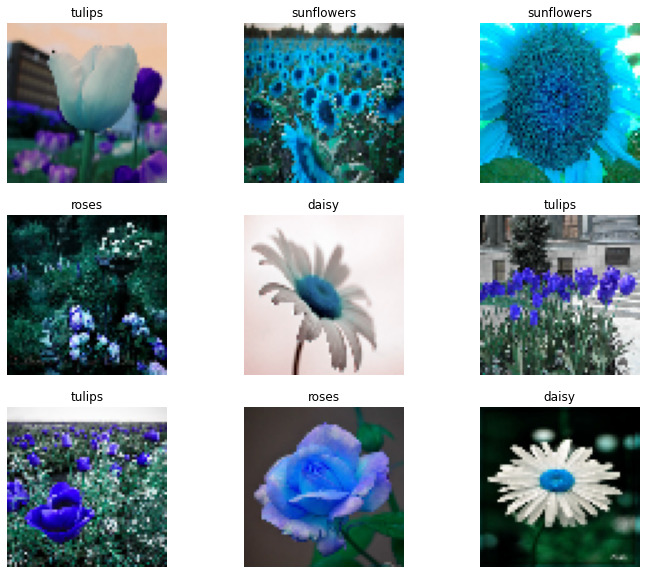

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(cnn_samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cnn_samples[n])
    plt.title(cnn_labels[n])
    plt.axis("off")

In [ ]:
# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
cnn_labels = lb.fit_transform(cnn_labels)
print("Labels shape",cnn_labels.shape)
cnn_labels = cnn_labels.astype(float)

Labels shape (3670, 5)


In [ ]:
print(cnn_samples.shape)
print(cnn_labels.shape)

(3670, 64, 64, 3)
(3670, 5)


In [ ]:
print(cnn_samples.shape)
print(cnn_labels.shape)
import sklearn.model_selection
(trainSamplesCNN, testSamplesCNN, trainLabelsCNN, testLabelsCNN) = sklearn.model_selection.train_test_split(cnn_samples,cnn_labels,random_state=22)

(3670, 64, 64, 3)
(3670, 5)


In [ ]:
print(trainSamplesCNN.shape)
print(trainLabelsCNN.shape)
print(testSamplesCNN.shape)
print(testLabelsCNN.shape)
#H = model.fit(trainSamplesCNN, trainLabelsCNN, epochs=10, validation_data=(testSamplesCNN,testLabelsCNN))

(2752, 64, 64, 3)
(2752, 5)
(918, 64, 64, 3)
(918, 5)


In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
cnnmodel = Sequential()
cnnmodel.add(Conv2D(32, (3, 3), padding="same",input_shape=(64,64,3)))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Activation("relu"))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Conv2D(32, (3, 3), padding="same"))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Activation("relu"))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Conv2D(64, (3, 3), padding="same"))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Activation("relu"))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Dropout(0.25))

cnnmodel.add(Flatten())
cnnmodel.add(Dense(512))
cnnmodel.add(Activation("sigmoid"))
cnnmodel.add(Dense(256))
cnnmodel.add(Activation("sigmoid"))
cnnmodel.add(Dense(5))
cnnmodel.add(Activation("softmax"))

cnnmodel.summary()
optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
cnnmodel.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_12 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)      

In [ ]:
# model.fit([samplesIMG,samplesCSV], labels, batch_size=BATCH,
# epochs=EPOCHS,validation_split=0.25)
BATCH=100
EPOCHS=60

cnnmodel.fit(trainSamplesCNN, trainLabelsCNN, batch_size=BATCH, epochs=EPOCHS, validation_split=0.25)

Epoch 1/60
21/21 [==============================] - 27s 1s/step - loss: 0.3851 - accuracy: 0.8842 - val_loss: 0.9375 - val_accuracy: 0.6541
Epoch 2/60
21/21 [==============================] - 24s 1s/step - loss: 0.3680 - accuracy: 0.8866 - val_loss: 1.0086 - val_accuracy: 0.6410
Epoch 3/60
21/21 [==============================] - 23s 1s/step - loss: 0.3582 - accuracy: 0.8915 - val_loss: 1.2320 - val_accuracy: 0.5901
Epoch 4/60
21/21 [==============================] - 25s 1s/step - loss: 0.3441 - accuracy: 0.9016 - val_loss: 0.9276 - val_accuracy: 0.6628
Epoch 5/60
21/21 [==============================] - 24s 1s/step - loss: 0.3433 - accuracy: 0.8953 - val_loss: 0.9737 - val_accuracy: 0.6424
Epoch 6/60
21/21 [==============================] - 24s 1s/step - loss: 0.3235 - accuracy: 0.9021 - val_loss: 0.9218 - val_accuracy: 0.6759
Epoch 7/60
21/21 [==============================] - 23s 1s/step - loss: 0.3079 - accuracy: 0.9133 - val_loss: 0.9650 - val_accuracy: 0.6628
Epoch 8/60
21/21 [==

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = cnnmodel.predict(testSamplesCNN)

print(confusion_matrix(testLabelsCNN.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabelsCNN.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabelsCNN.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabelsCNN.argmax(axis=1), testResults.argmax(axis=1)))


29/29 [==============================] - 3s 108ms/step
[[ 91  35  16  15  14]
 [  7 177   3  25   4]
 [  8  25  65  11  37]
 [  0  11   2 171   5]
 [  4  17  19  17 139]]
              precision    recall  f1-score   support

           0       0.83      0.53      0.65       171
           1       0.67      0.82      0.74       216
           2       0.62      0.45      0.52       146
           3       0.72      0.90      0.80       189
           4       0.70      0.71      0.70       196

    accuracy                           0.70       918
   macro avg       0.71      0.68      0.68       918
weighted avg       0.71      0.70      0.69       918

Cohen's Kappa: 0.6216101167770085
Accuracy:  0.7004357298474946


In [ ]:
from keras import Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
numClasses = 5
loss='categorical_crossentropy'
print(cnnmodel.output)
print(dense_model.output)
combined = concatenate([cnnmodel.output, dense_model.output])
combined = Dense(16, activation="sigmoid")(combined)
combined = Dense(numClasses, activation="sigmoid")(combined)
model = Model(inputs=[cnnmodel.input, dense_model.input],
outputs=combined)
model.compile(loss=loss, optimizer="adam",metrics=['accuracy'])

KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), name='activation_17/Softmax:0', description="created by layer 'activation_17'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), name='dense_127/Softmax:0', description="created by layer 'dense_127'")


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_6_input (InputLayer)    [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 64, 64, 32)   896         ['conv2d_6_input[0][0]']         
                                                                                                  
 conv2d_7 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d_6[0][0]']               
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 64, 64, 32)  128         ['conv2d_7[0][0]']               
 rmalization)                                                                               

In [ ]:
print(cnn_samples.shape)
print(np.array(new_samples).shape)

(3670, 12288)
(3670, 532)


In [ ]:
print(trainSamplesCNN.shape)
print(trainSamplesDense.shape)
print(trainLabelsCNN.shape)
mockLabels = np.arange(13760).reshape(2752,5)
print(mockLabels.shape)

(2752, 64, 64, 3)
(2752, 532)
(2752,)
(2752, 5)


In [ ]:
print(trainLabelsDense.shape)

(2752, 5)


In [ ]:
# model.fit([samplesIMG,samplesCSV], labels, batch_size=BATCH,
# epochs=EPOCHS,validation_split=0.25)
BATCH=100
EPOCHS=15

model.fit([trainSamplesCNN, trainSamplesDense], trainLabelsDense, batch_size=BATCH, epochs=EPOCHS, validation_split=0.25)

Epoch 1/15
21/21 [==============================] - 23s 1s/step - loss: 1.6997 - accuracy: 0.1904 - val_loss: 1.6883 - val_accuracy: 0.1744
Epoch 2/15
21/21 [==============================] - 25s 1s/step - loss: 1.6438 - accuracy: 0.1904 - val_loss: 1.6374 - val_accuracy: 0.1744
Epoch 3/15
21/21 [==============================] - 24s 1s/step - loss: 1.6182 - accuracy: 0.1894 - val_loss: 1.6145 - val_accuracy: 0.2122
Epoch 4/15
21/21 [==============================] - 24s 1s/step - loss: 1.6062 - accuracy: 0.2238 - val_loss: 1.6048 - val_accuracy: 0.2122
Epoch 5/15
21/21 [==============================] - 23s 1s/step - loss: 1.6030 - accuracy: 0.2263 - val_loss: 1.5983 - val_accuracy: 0.2936
Epoch 6/15
21/21 [==============================] - 22s 1s/step - loss: 1.5964 - accuracy: 0.2573 - val_loss: 1.5880 - val_accuracy: 0.3241
Epoch 7/15
21/21 [==============================] - 22s 1s/step - loss: 1.5813 - accuracy: 0.3387 - val_loss: 1.5700 - val_accuracy: 0.3547
Epoch 8/15
21/21 [==

In [ ]:
results = model.predict([testSamplesCNN, testSamplesDense])

29/29 [==============================] - 5s 180ms/step


In [ ]:
print(results.shape)
print(testLabelsDense.shape)

print(confusion_matrix(testLabelsDense.argmax(axis=1), results.argmax(axis=1)))
print(classification_report(testLabelsDense.argmax(axis=1), results.argmax(axis=1)))
accuracy = accuracy_score(testLabelsDense.argmax(axis=1), results.argmax(axis=1))
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabelsDense.argmax(axis=1), results.argmax(axis=1))))

(918, 5)
(918, 5)
[[  0  88   0  54  19]
 [  0 144   0  67  18]
 [  0  92   0  43  16]
 [  0 123   0  46  17]
 [  0 118   0  58  15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.25      0.63      0.36       229
           2       0.00      0.00      0.00       151
           3       0.17      0.25      0.20       186
           4       0.18      0.08      0.11       191

    accuracy                           0.22       918
   macro avg       0.12      0.19      0.13       918
weighted avg       0.14      0.22      0.15       918

Accuracy: 0.22
Cohen's Kappa: -0.01


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(testLabelsCNN.argmax(axis=1), results.argmax(axis=1)))
print(classification_report(testLabelsCNN.argmax(axis=1), results.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabelsCNN.argmax(axis=1), results.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabelsCNN.argmax(axis=1), results.argmax(axis=1)))

[[  0 107   0  53  11]
 [  0 134   0  55  27]
 [  0  96   0  38  12]
 [  0 113   0  64  12]
 [  0 115   0  58  23]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.24      0.62      0.34       216
           2       0.00      0.00      0.00       146
           3       0.24      0.34      0.28       189
           4       0.27      0.12      0.16       196

    accuracy                           0.24       918
   macro avg       0.15      0.22      0.16       918
weighted avg       0.16      0.24      0.17       918

Cohen's Kappa: 0.020701836013786945
Accuracy:  0.24074074074074073


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#ResNet50

In [ ]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')
print('model has',len(model.layers),'layers')
model.summary()

In [ ]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (224,224))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
print('loaded',len(samples),' samples')

print('classes',set(labels))

loaded 3670  samples
classes {'roses', 'tulips', 'sunflowers', 'daisy', 'dandelion'}


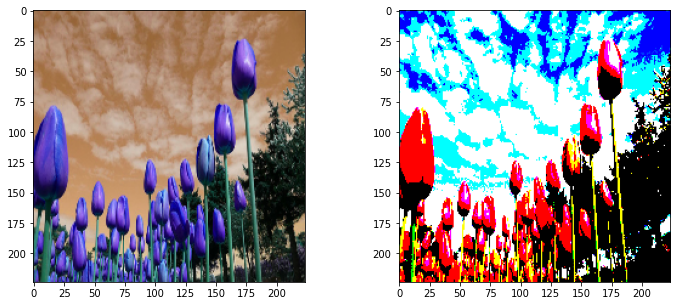

In [ ]:
org_samples = samples[:]
samples = tf.keras.applications.resnet50.preprocess_input(samples)

## compare original and preprocessed
fig,(org_plot,prep_plot) = plt.subplots(1,2, figsize=(12, 5))
org_plot.imshow(org_samples[1])
prep_plot.imshow(samples[1])

In [ ]:
predictions = model.predict(samples)

115/115 [==============================] - 628s 5s/step


In [ ]:
top3 = tf.keras.applications.resnet50.decode_predictions(predictions, top = 3)
for i in range(len(samples)):
#    print(labels[i],'->',top3[i])

## Pretty version
   print("{} -> ({}:{:.2f}, {}:{:.2f}, {}:{:.2f})".format(labels[i],
                top3[i][0][1],top3[i][0][2],
                top3[i][1][1],top3[i][1][2],
                top3[i][2][1],top3[i][2][2]))

In [ ]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
for i in range(9):
    n = random.randrange(len(samples))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(org_samples[n])
    plt.title(tf.keras.applications.resnet50.decode_predictions(predictions, top = 1)[n][0][1])
    plt.axis("off")

In [ ]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)
print("Layers:",len(base_model.layers))
#base_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Layers: 175


In [ ]:
print("Full model:",len(model.layers),'layers')
for i,layer in enumerate(model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

print()
print("Base model:",len(base_model.layers),'layers')
for i,layer in enumerate(base_model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(base_model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

Full model: 177 layers
   0 input_1 <class 'keras.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'keras.layers.convolutional.conv2d.Conv2D'>
   172 conv5_block3_3_bn <class 'keras.layers.normalization.batch_normalization.BatchNormalization'>
   173 conv5_block3_add <class 'keras.layers.merging.add.Add'>
   174 conv5_block3_out <class 'keras.layers.core.activation.Activation'>
   175 avg_pool <class 'keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
   176 predictions <class 'keras.layers.core.dense.Dense'>

Base model: 175 layers
   0 input_2 <class 'keras.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'keras.layers.convolutional.con

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
last_layer = tf.keras.layers.Dense(5, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = base_model.input, outputs = last_layer)

print("Combined model:",len(model.layers),'layers')

Combined model: 181 layers


In [ ]:
for layer in model.layers[:175]:
    layer.trainable = False

for layer in model.layers[175:]:
    layer.trainable = True

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # encoder
intlabels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(intlabels)
print("One-hot labels",labels.shape)

One-hot labels (3670, 5)


In [ ]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,
                test_size=0.5
                #random_state=42
                )
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpt = ModelCheckpoint (filepath='resnet50_model.h5', save_best_only=True)
estopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

EPOCHS = 5
H = model.fit(trainSamples, trainLabels, epochs=EPOCHS, batch_size=10, validation_data=(testSamples,testLabels),
             callbacks = [estopping,checkpt])
print("Done")

(3670, 224, 224, 3)
Epoch 1/5
184/184 [==============================] - 1663s 9s/step - loss: 1.5063 - accuracy: 0.3537 - val_loss: 3094.3152 - val_accuracy: 0.1918
Epoch 2/5
184/184 [==============================] - 1663s 9s/step - loss: 1.3334 - accuracy: 0.4294 - val_loss: 2.8499 - val_accuracy: 0.2747
Epoch 3/5
184/184 [==============================] - 1646s 9s/step - loss: 1.2680 - accuracy: 0.4534 - val_loss: 7.5015 - val_accuracy: 0.3586
Epoch 4/5
184/184 [==============================] - 1643s 9s/step - loss: 1.2301 - accuracy: 0.4627 - val_loss: 1.1608 - val_accuracy: 0.5259
Epoch 5/5
184/184 [==============================] - 1656s 9s/step - loss: 1.1766 - accuracy: 0.4801 - val_loss: 1.2024 - val_accuracy: 0.5101
Done


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("CNN Accuracy: {:.2f}".format(accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))

58/58 [==============================] - 295s 5s/step
[[ 10 263   8   0  26]
 [ 10 351   4  70  18]
 [ 13  61  13   1 214]
 [ 11  65   2 231  40]
 [ 16  61   7   9 331]]
              precision    recall  f1-score   support

           0       0.17      0.03      0.05       307
           1       0.44      0.77      0.56       453
           2       0.38      0.04      0.08       302
           3       0.74      0.66      0.70       349
           4       0.53      0.78      0.63       424

    accuracy                           0.51      1835
   macro avg       0.45      0.46      0.40      1835
weighted avg       0.46      0.51      0.44      1835

CNN Accuracy: 0.51
Cohen's Kappa: 0.37


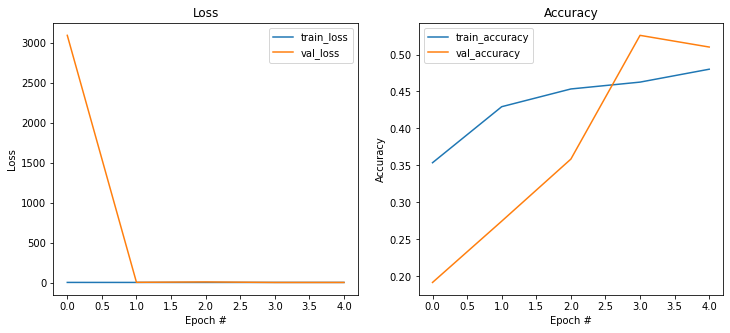

In [ ]:
import matplotlib.pyplot as plt
N = np.arange(0, len(H.history["loss"]))

fig,(loss_plot,acc_plot) = plt.subplots(1,2, figsize=(12, 5))

loss_plot.plot(N, H.history["loss"], label="train_loss")
loss_plot.plot(N, H.history["val_loss"], label="val_loss")
loss_plot.set_title("Loss")
loss_plot.set(xlabel='Epoch #', ylabel='Loss')
loss_plot.legend()

acc_plot.plot(N, H.history["accuracy"], label="train_accuracy")
acc_plot.plot(N, H.history["val_accuracy"], label="val_accuracy")
acc_plot.set_title("Accuracy")
acc_plot.set(xlabel='Epoch #', ylabel='Accuracy')
acc_plot.legend()